# Logistic Classification (Heart Disease)
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the Heart Disease dataset and display the first few rows

In [2]:
dataset = pd.read_csv('HeartDisease.csv')
print(dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


## Check empty data and delete its empty row

In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


In [7]:
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [10]:
dataset.dropna(subset = ['thal'], inplace=True)
dataset.dropna(subset = ['ca'], inplace=True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB
None


## Feature selection

In [11]:
X = dataset.drop(columns=["num"])  # Features
y = dataset["num"]   # Target

## Splitting the dataset into the Training set and Test set (70:30)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training the Logistic Regression model on the Training set

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

## Predicting the Test set results

In [15]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

## Making the Confusion Matrix and print the classification report

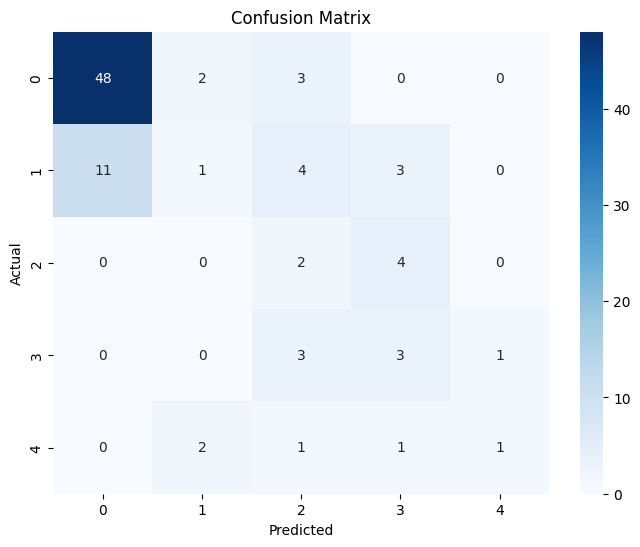

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        53
           1       0.20      0.05      0.08        19
           2       0.15      0.33      0.21         6
           3       0.27      0.43      0.33         7
           4       0.50      0.20      0.29         5

    accuracy                           0.61        90
   macro avg       0.39      0.38      0.35        90
weighted avg       0.58      0.61      0.58        90

Accuracy :  0.6111111111111112
Precision :  0.5805645766662716
F1 Squared :  0.5781885268727375
AUC :  0.8052762702304573
Recall :  0.6111111111111112


In [16]:
# Evaluasi model dan tampilkan hasilnya
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, recall_score
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='weighted')
#print(f"\nAccuracy: {accuracy * 100:.2f}%")
print('Accuracy : ',accuracy)
print('Precision : ',precision)
print('F1 Squared : ',f1)
print('AUC : ',auc)
print('Recall : ',recall)

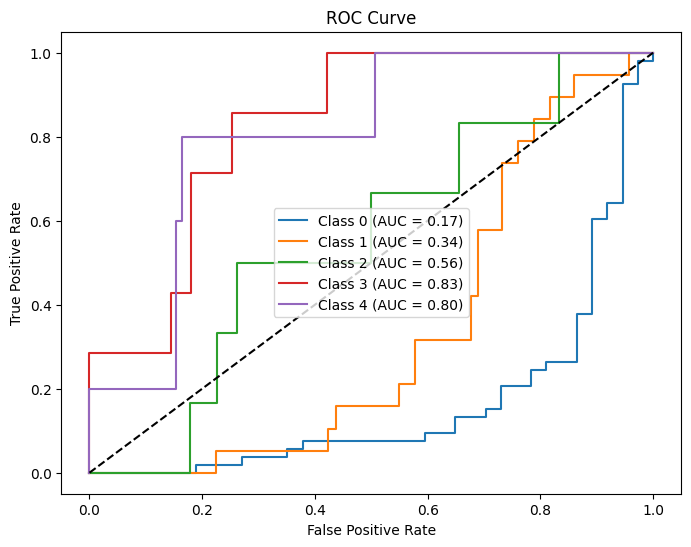

In [17]:
# Gambarkan kurva ROC
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(8, 6))
for i in np.unique(y):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i-1])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_score(y_test == i, y_prob[:, i-1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Accuracy
Accuracy adalah metrik yang mengukur seberapa banyak prediksi yang benar dibandingkan dengan total prediksi yang dilakukan. Rumusnya:

[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} ]

Di mana:

*   TP (True Positive): Prediksi positif yang benar.
*   TN (True Negative): Prediksi negatif yang benar.
*   FP (False Positive): Prediksi positif yang salah.
*   FN (False Negative): Prediksi negatif yang salah.

Accuracy cocok digunakan jika dataset memiliki distribusi kelas yang seimbang.

## Precision
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan semua prediksi positif yang dilakukan. Rumusnya:

[ Precision = \frac{TP}{TP + FP} ]

Precision penting dalam kasus di mana False Positive harus diminimalkan, seperti dalam deteksi spam email.

## Recall
Recall (juga disebut Sensitivity atau True Positive Rate) mengukur seberapa banyak sampel positif yang berhasil diklasifikasikan dengan benar. Rumusnya:

[ Recall = \frac{TP}{TP + FN} ]

Recall penting dalam kasus di mana False Negative harus diminimalkan, seperti dalam diagnosis penyakit.

## F1-Score
F1-Score adalah rata-rata harmonik dari Precision dan Recall. Rumusnya:

[ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} ]

F1-Score digunakan ketika kita ingin keseimbangan antara Precision dan Recall, terutama jika dataset memiliki ketidakseimbangan kelas.

## AUC-ROC (Area Under Curve - Receiver Operating Characteristic)
AUC-ROC digunakan untuk mengevaluasi performa model klasifikasi pada berbagai threshold. ROC (Receiver Operating Characteristic) adalah kurva yang menunjukkan hubungan antara:

*   True Positive Rate (TPR) atau Recall: ( TPR = \frac{TP}{TP + FN} )
*   False Positive Rate (FPR): ( FPR = \frac{FP}{FP + TN} )

AUC (Area Under Curve) mengukur area di bawah kurva ROC. Nilai AUC berkisar antara 0 hingga 1, di mana semakin tinggi nilai AUC, semakin baik performa model.